# .

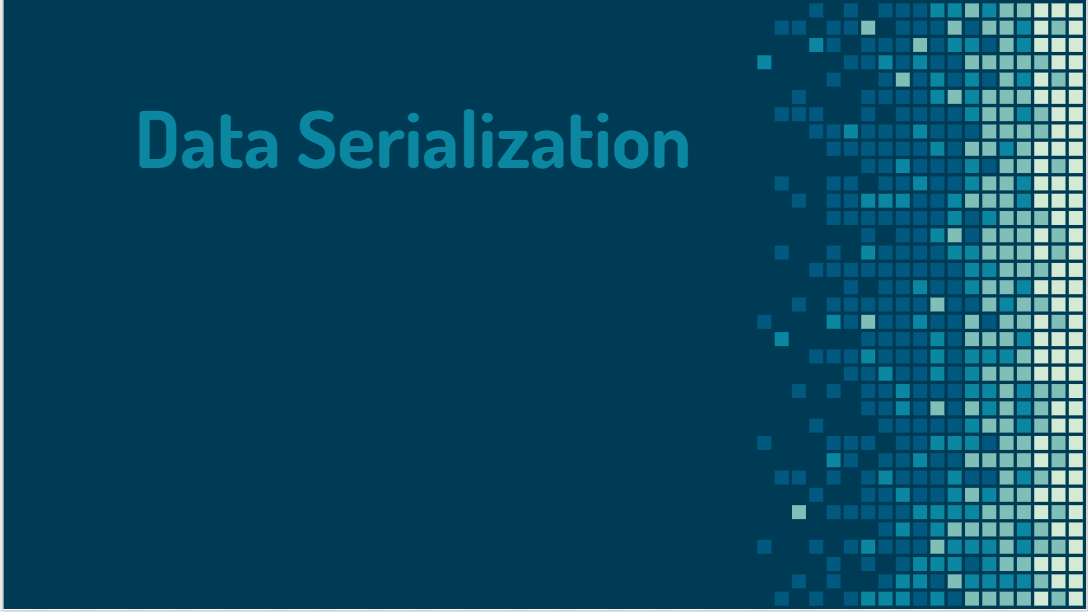

In [ ]:
! pip install pydantic

# **Deserialize Child Classes With Pydantic - How does it work?**

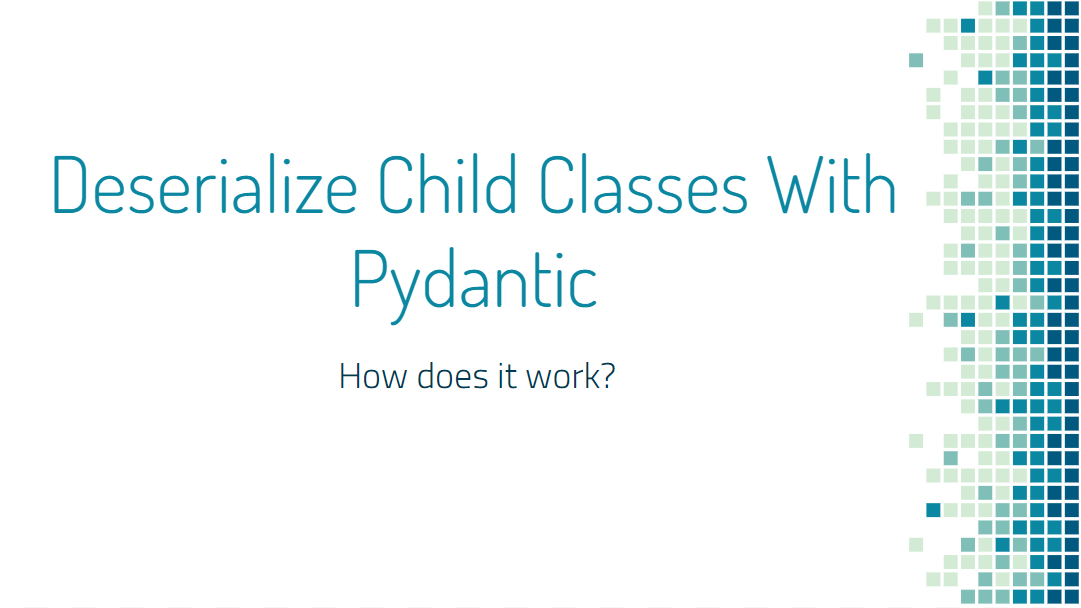

In [ ]:
from pydantic import BaseModel
from typing import Tuple, List
from datetime import date
from enum import Enum
import pprint
import json


class BabyProductBase(BaseModel):
  age_range: Tuple[float, float] = None
  price: float = None


class CarSeat(BabyProductBase): 
  brand: str = None
  expiration_date_of_FMVSS213_standard: date = None 


class StrollerSeaters(Enum):
  Single = 'single'
  Twins = 'twins'


class Stroller(BabyProductBase): 
  brand: str = None 
  stroller_seaters: StrollerSeaters = StrollerSeaters.Single


class BabyStore(BaseModel): 
  products: List[BabyProductBase] = None


def print_json_str(json_str):
  json_obj = json.loads(json_str)
  pprint.pprint(json_obj)

In [ ]:
katkatim = BabyStore(products=[
  CarSeat(age_range=(0, 3), price=800, brand='chippo', expiration_date_of_FMVSS213_standard=date(2026, 1,1)), 
  Stroller(age_range=(0, 1.5), price=1500, brand='sto', stroller_seaters=StrollerSeaters.Single),
  Stroller(age_range=(0, 1.5), price=3200, brand='stwins', stroller_seaters=StrollerSeaters.Twins),
])

In [ ]:
katkatim_json = katkatim.json()
print_json_str(katkatim_json)

In [ ]:
katkatim_loaded = BabyStore.parse_raw(katkatim_json)
pprint.pprint(katkatim_loaded.products)

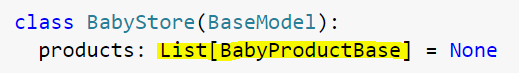

# **Deserialize Child Classes With Pydantic - class Config**
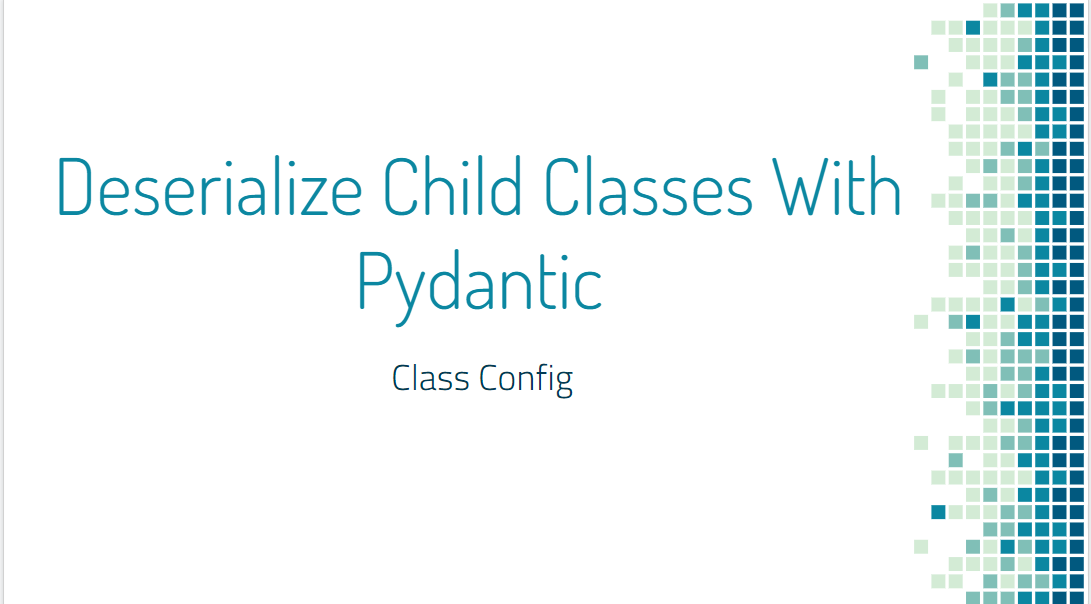

In [ ]:
from pydantic import BaseModel
from typing import Tuple, List
from datetime import date
from enum import Enum


class BabyProductBase(BaseModel):
  age_range: Tuple[float, float] = None
  price: float = None       
  
  class Config:         
    extra = 'allow' 


class CarSeat(BabyProductBase): 
  brand: str = None
  expiration_date_of_FMVSS213_standard: date = None 


class StrollerSeaters(Enum):
  Single = 'single'
  Twins = 'twins'


class Stroller(BabyProductBase): 
  brand: str = None 
  stroller_seaters: StrollerSeaters = StrollerSeaters.Single


class BabyStore(BaseModel): 
  products: List[BabyProductBase] = None

In [ ]:
katkatim = BabyStore(products=[     
  CarSeat(age_range=(0, 3), price=800, brand='chippo', expiration_date_of_FMVSS213_standard=date(2026, 1,1)),      
  Stroller(age_range=(0, 1.5), price=1500, brand='sto', stroller_seaters=StrollerSeaters.Single),     
  Stroller(age_range=(0, 1.5), price=3200, brand='stwins', stroller_seaters=StrollerSeaters.Twins),
])

katkatim_json = katkatim.json()
print_json_str(katkatim_json)

katkatim_loaded = BabyStore.parse_raw(katkatim_json)
pprint.pprint(katkatim_loaded.products)

# **Why is it so important to parse into the right classes?**
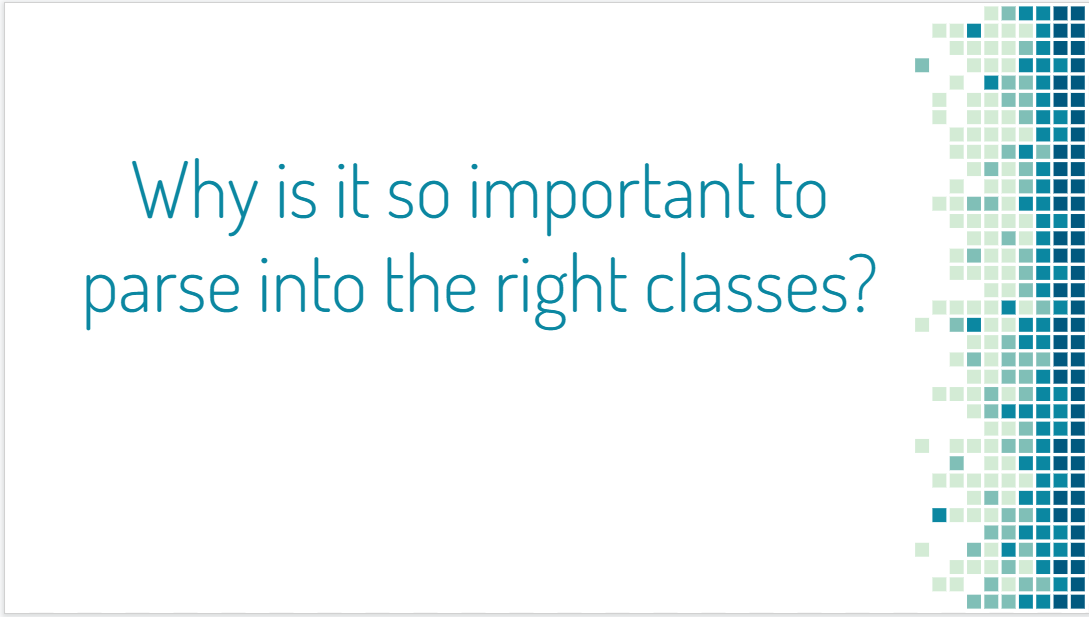

In [ ]:
from pydantic import BaseModel, validator
from typing import Tuple, List
from datetime import date, datetime 


class BabyProductBase(BaseModel):
  age_range: Tuple[float, float] = None
  price: float = None       
  
  class Config:         
    extra = 'allow'


class CarSeat(BabyProductBase): 
  brand: str = None
  expiration_date_of_FMVSS213_standard: date = None

  @validator('expiration_date_of_FMVSS213_standard') 
  def validate_expiration_date_of_FMVSS213_standard(cls, v):
    if v < datetime.now().date() :
      raise ValueError(
              'CarSeat expiration date of FMVSS213 standard pass') 
    return v 


class StrollerSeaters(Enum):
  Single = 'single'
  Twins = 'twins'


class Stroller(BabyProductBase): 
  brand: str = None 
  stroller_seaters: StrollerSeaters = StrollerSeaters.Single

class BabyStore(BaseModel): 
  products: List[BabyProductBase] = None

In [ ]:
BabyProductBase.parse_raw('{"age_range": [0.0, 1.5], "price": 1500.0, "brand": "chippo", "expiration_date_of_FMVSS213_standard": "2022-01-01"}')

In [ ]:
CarSeat.parse_raw('{"age_range": [0.0, 1.5], "price": 1500.0, "brand": "stchippo", "expiration_date_of_FMVSS213_standard": "2022-01-01"}')

# **Hint possible child classes**
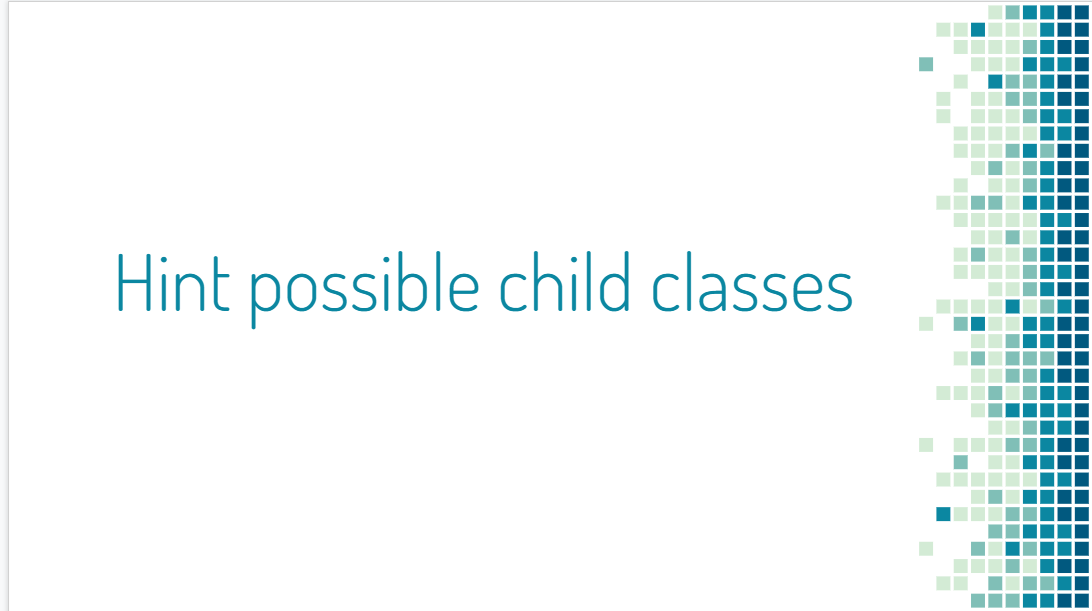

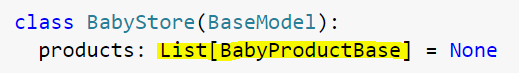

In [ ]:
from pydantic import BaseModel
from typing import Tuple, List, Union
from datetime import date


class BabyProductBase(BaseModel):
  age_range: Tuple[float, float] = None
  price: float = None       

  class Config:         
    extra = 'allow'


class CarSeat(BabyProductBase): 
  brand: str = None
  expiration_date_of_FMVSS213_standard: date = None 


class StrollerSeaters(Enum):
  Single = 'single'
  Twins = 'twins'


class Stroller(BabyProductBase): 
  brand: str = None 
  stroller_seaters: StrollerSeaters = StrollerSeaters.Single


class BabyStore(BaseModel): 
    products: List[Union[CarSeat, Stroller]] = None

In [ ]:
katkatim = BabyStore(products=[     
  CarSeat(age_range=(0, 3), price=800, brand='chippo', expiration_date_of_FMVSS213_standard=date(2026, 1,1)),
  Stroller(age_range=(0, 1.5), price=1500, brand='sto', stroller_seaters=StrollerSeaters.Single),     
  Stroller(age_range=(0, 1.5), price=3200, brand='stwins', stroller_seaters=StrollerSeaters.Twins),
])

katkatim_json = katkatim.json()
print_json_str(katkatim_json)

# **Delete Default Values**
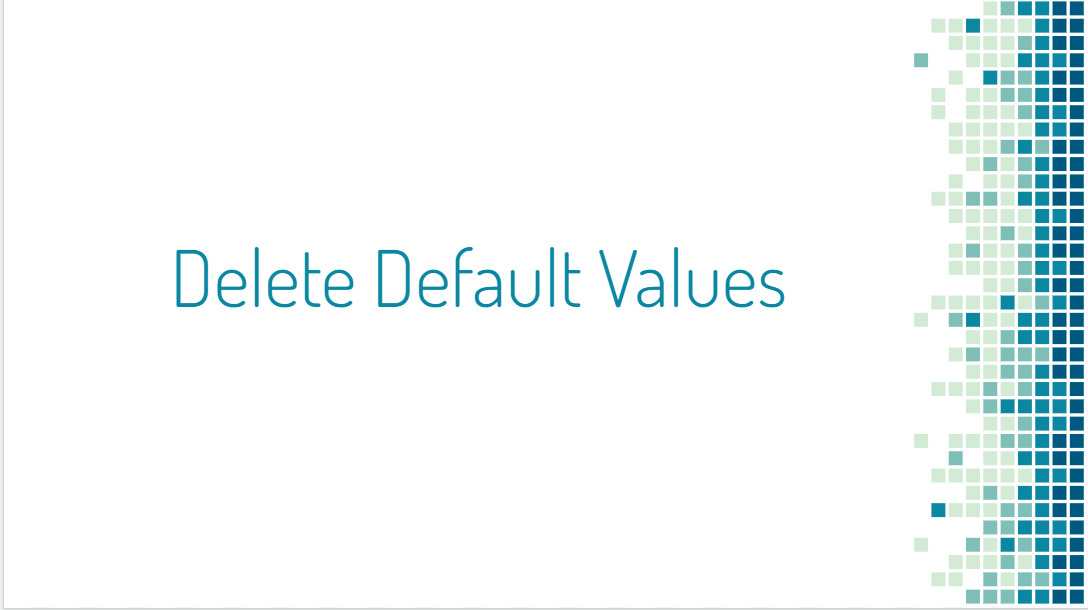

In [ ]:
from pydantic import BaseModel
from typing import Tuple, List, Union
from datetime import date


class BabyProductBase(BaseModel):
  age_range: Tuple[float, float] = None
  price: float = None       
  
  class Config:         
    extra = 'allow'

class CarSeat(BabyProductBase): 
  brand: str
  expiration_date_of_FMVSS213_standard: date


class StrollerSeaters(Enum):
  Single = 'single'
  Twins = 'twins'


class Stroller(BabyProductBase): 
  brand: str
  stroller_seaters: StrollerSeaters


class BabyStore(BaseModel): 
  products: List[Union[CarSeat, Stroller]] = None

In [ ]:
katkatim = BabyStore(products=[     
  CarSeat(age_range=(0, 3), price=800, brand='chippo', expiration_date_of_FMVSS213_standard=date(2026, 1,1)),
  Stroller(age_range=(0, 1.5), price=1500, brand='sto', stroller_seaters=StrollerSeaters.Single),     
  Stroller(age_range=(0, 1.5), price=3200, brand='stwins', stroller_seaters=StrollerSeaters.Twins), 
])

katkatim_json = katkatim.json()
print_json_str(katkatim_json)

katkatim_loaded = BabyStore.parse_raw(katkatim_json)
pprint.pprint(katkatim_loaded.products)

# **Hint dynamically by attributes’ names**
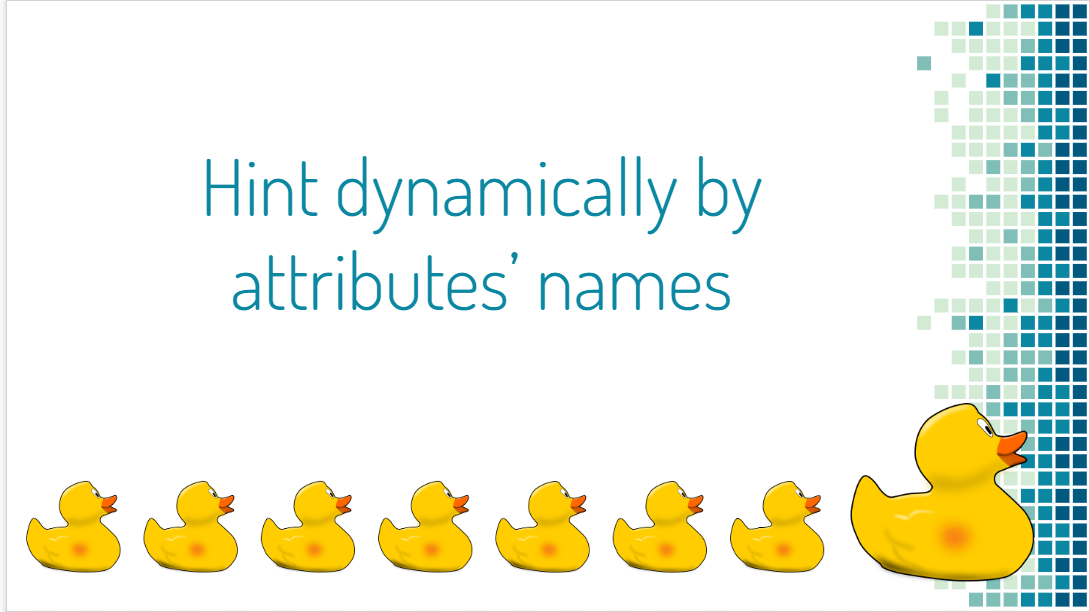

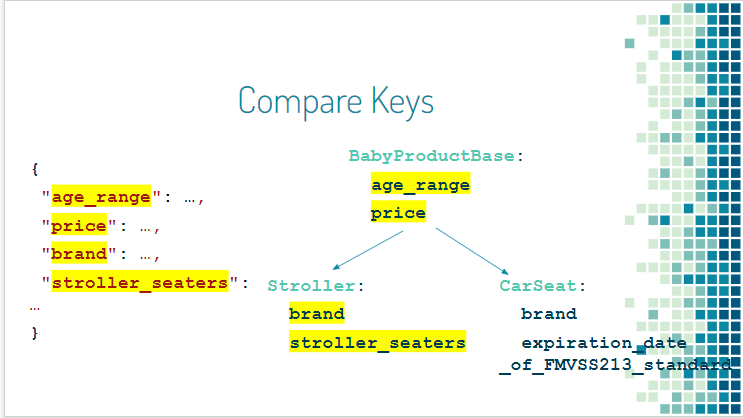

In [ ]:
from pydantic import BaseModel
from typing import Tuple, List, Union, Any
from datetime import date

subclass_registry = {}


class BabyProductBase(BaseModel):
  age_range: Tuple[float, float] = None
  price: float = None

  def __init_subclass__(cls, **kwargs: Any) -> None:
    super().__init_subclass__(**kwargs)
    subclass_registry[cls.__name__] = cls    
       
  class Config:         
    extra = 'allow'

class CarSeat(BabyProductBase): 
  brand: str = None
  expiration_date_of_FMVSS213_standard: date = None 


class StrollerSeaters(Enum):
  Single = 'single'
  Twins = 'twins'


class Stroller(BabyProductBase): 
  brand: str = None 
  stroller_seaters: StrollerSeaters = StrollerSeaters.Single


class BabyStore(BaseModel): 
  products: List[BabyProductBase] = None

  def compare_to_sub_class(self, subclass: BabyProductBase, current_product_keys: List[str]) -> bool:
    subclass_keys = sorted(subclass.__fields__.keys())
    return current_product_keys == subclass_keys

  def get_current_product_in_right_sub_class(self, current_product):
    current_product_keys = sorted(current_product.keys())
    for name, subclass in subclass_registry.items():
      if self.compare_to_sub_class(subclass, current_product_keys):
        current_product = subclass(**current_product) 
        break
    return current_product

  def __init__(self, **kwargs):
    for index in range(len(kwargs['products'])):
      current_product = kwargs['products'][index]
      if isinstance(current_product, dict):
        current_product = self.get_current_product_in_right_sub_class(current_product)
        kwargs['products'][index] = current_product
    super().__init__(**kwargs)

In [ ]:
katkatim = BabyStore(products=[     
  CarSeat(age_range=(0, 3), price=800, brand='chippo', expiration_date_of_FMVSS213_standard=date(2026, 1,1)), 
  Stroller(age_range=(0, 1.5), price=1500, brand='sto', stroller_seaters=StrollerSeaters.Single),     
  Stroller(age_range=(0, 1.5), price=3200, brand='stwins', stroller_seaters=StrollerSeaters.Twins), 
])

katkatim_json = katkatim.json()
print_json_str(katkatim_json)

katkatim_loaded = BabyStore.parse_raw(katkatim_json)
pprint.pprint(katkatim_loaded.products)

# **Bonus: Hint dynamically by attributes’ names - what happened when add fields?**
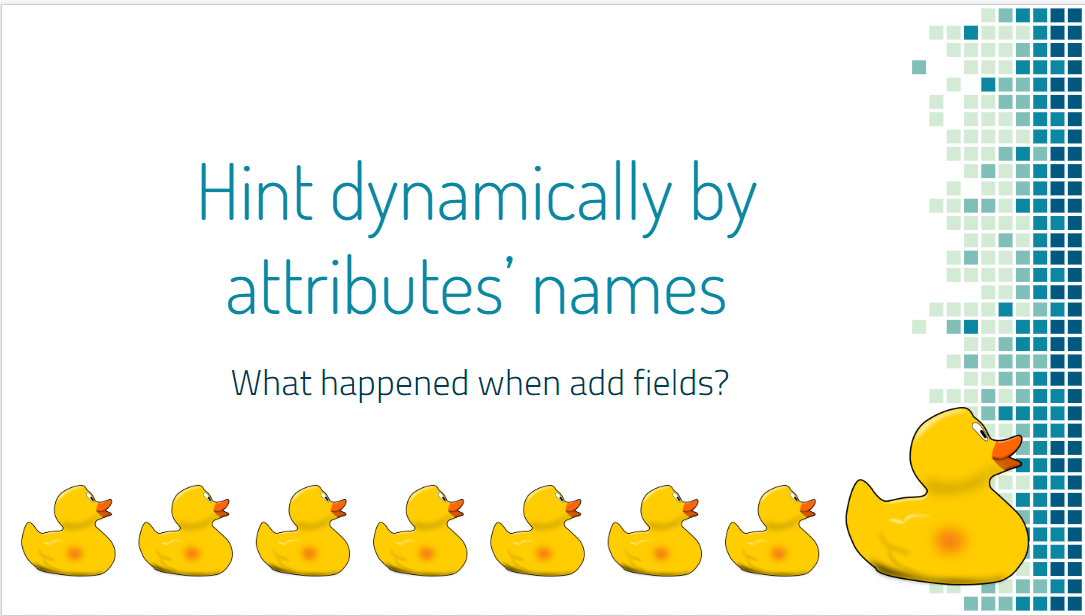

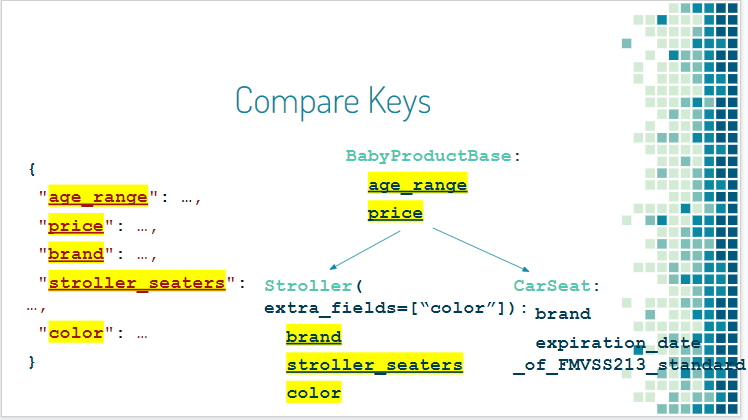

In [ ]:
from pydantic import BaseModel
from typing import Tuple, List, Union, Any
from datetime import date
from typing_extensions import Literal, Annotated 

subclass_registry = {}


class BabyProductBase(BaseModel):
  age_range: Tuple[float, float] = None
  price: float = None

  def __init_subclass__(cls, extra_fields = None, **kwargs: Any) -> None:
    super().__init_subclass__(**kwargs)
    subclass_registry[cls.__name__] = (cls, extra_fields or []) 
      
  class Config:         
    extra = 'allow'


class CarSeat(BabyProductBase):     
  brand: str = None
  expiration_date_of_FMVSS213_standard: date = None


class StrollerSeaters(Enum):
  Single = 'single'
  Twins = 'twins'


class Stroller(BabyProductBase, extra_fields=['color']): 
  brand: str = None 
  stroller_seaters: StrollerSeaters = StrollerSeaters.Single
  color: str = None


class BabyStore(BaseModel): 
  products: List[BabyProductBase] = None

  def compare_to_sub_class(self, subclass: BabyProductBase, current_product_keys: List[str]) -> bool:
    subclass_keys = sorted(subclass.__fields__.keys())
    return current_product_keys == subclass_keys

  def compare_to_sub_class_without_extra_fields(self, subclass: BabyProductBase, current_product_keys: List[str], extra_fields: List[str]) -> bool:
    subclass_keys_without_extra_fields =  list(filter(lambda v: v not in extra_fields, sorted(subclass.__fields__.keys())))
    return current_product_keys == subclass_keys_without_extra_fields

  def get_current_product_in_right_sub_class(self, current_product) -> Tuple[BabyProductBase, bool]:
    is_parse_child_class = False 
    current_product_keys = sorted(current_product.keys())
    for name, (subclass, extra_fields) in subclass_registry.items():
      if self.compare_to_sub_class(subclass, current_product_keys):
        current_product = subclass(**current_product) 
        is_parse_child_class = True
        break
    return current_product, is_parse_child_class

  def get_current_product_in_right_sub_class_without_extra_fields(self, current_product) -> BabyProductBase:
    current_product_keys = sorted(current_product.keys())
    for name, (subclass, extra_fields) in subclass_registry.items():
      if self.compare_to_sub_class_without_extra_fields(subclass, current_product_keys, extra_fields):
        current_product = subclass(**current_product) 
        break
    return current_product

  def __init__(self, **kwargs):
    for index in range(len(kwargs['products'])):
      current_product = kwargs['products'][index]
      if isinstance(current_product, dict):
        current_product, is_parse_child_class = self.get_current_product_in_right_sub_class(current_product)
        if not is_parse_child_class:
          current_product = self.get_current_product_in_right_sub_class_without_extra_fields(current_product)
        kwargs['products'][index] = current_product
    super().__init__(**kwargs)

In [ ]:
katkatim_json = '''{"products": [
  {"age_range": [0.0, 3.0], "price": 800.0, "brand": "chippo", "expiration_date_of_FMVSS213_standard": "2026-01-01"}, 
  {"age_range": [0.0, 1.5], "price": 1500.0, "brand": "sto", "stroller_seaters": "single"}, 
  {"age_range": [0.0, 1.5], "price": 3200.0, "color": "red", "brand": "stwins", "stroller_seaters": "twins"}]}
'''

katkatim_loaded = BabyStore.parse_raw(katkatim_json)
pprint.pprint(katkatim_loaded.products)

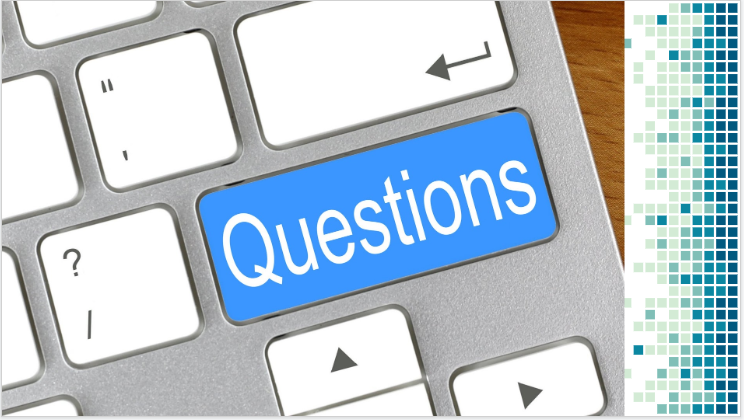